<a href="https://colab.research.google.com/github/atharv-maske-19/Syntecxhub_-Project_Rule-Based-Expert-System/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Detection & Recognition

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=50)
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
faces.data.shape

(1560, 2914)

In [ ]:
faces.images[0].shape

(62, 47)

In [ ]:
62*47

2914

In [ ]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [ ]:
faces.target_names.size

12

In [ ]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
faces.target_names[4]

np.str_('Gerhard Schroeder')

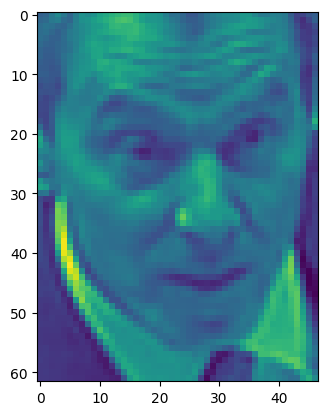

In [ ]:
plt.imshow(faces.images[0])

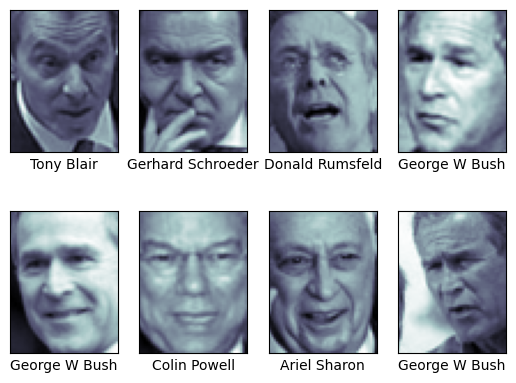

In [ ]:
fig, ax = plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx],cmap='bone')
    axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pcaModel = PCA(n_components=150, whiten=True)
svmModel = SVC(kernel='rbf', class_weight='balanced')


mdl = make_pipeline(pcaModel, svmModel)



In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid ={'svc__c':[1,5,15,30],'svc__gamma':[0.00001,0.00005,0.0001,0.005]}
grid=GridSearchCV(mdl,param_grid)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svc__C': [1, 5, 15, 30],          # uppercase C
    'svc__gamma': [1e-5, 5e-5, 1e-4, 5e-3]  # scientific notation OK
}

grid = GridSearchCV(mdl, param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(Xtrain, ytrain)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]},
             verbose=2)

In [ ]:
print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.005}


In [ ]:
mdl=grid.best_estimator_

In [ ]:
y_orid=mdl.predict(Xtest)

In [ ]:
ytest

array([ 7,  3,  3,  3,  7,  1,  3,  9,  5,  9,  3,  3,  2,  4,  3, 10,  3,
        2,  8,  2,  3,  6,  3,  4,  3,  0,  1,  3,  5,  4,  4,  3,  3, 11,
        3,  0,  7,  0,  3,  3,  6,  1,  0,  3, 11,  3,  9,  6,  9,  8, 11,
        3,  3, 11, 11,  2,  4,  3,  3,  3,  1,  7, 11,  0,  3, 11,  3,  3,
       11,  2,  0,  1,  1, 11,  4,  1,  3,  6,  3, 11,  1,  5,  1,  3, 10,
       10,  3, 11,  1,  3,  9,  3, 10,  3,  2,  3, 11,  3,  3,  0,  3,  3,
        3,  2,  4,  2, 11,  1,  4,  3,  2,  1,  7,  3,  3,  2, 11,  2,  2,
        4,  3,  3,  8,  2,  3,  3,  1,  3,  1, 10,  3,  3,  1,  1,  3,  3,
        3,  3,  5,  1,  1,  3,  9,  3,  4,  1,  7,  1,  7,  0,  5,  7,  4,
        3,  3,  3,  3,  3,  2,  3,  0,  1,  3,  3, 10, 11,  9,  4,  7,  3,
        3,  3,  1, 10,  3, 10,  3, 11,  1,  3,  2,  3,  1,  2,  4,  5,  3,
        3,  3,  2,  8, 11,  3,  2,  1, 10,  1,  4, 11,  3,  2,  5,  8, 10,
        2,  0,  1,  6,  3,  6,  3,  4,  5, 11,  0,  9,  3,  7, 10,  1,  1,
        4,  0, 11,  3,  3

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

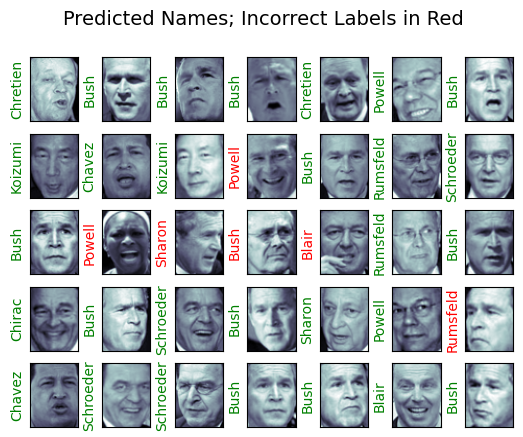

In [ ]:
fig,ax=plt.subplots(5,7)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(Xtest[idx].reshape(62,47),cmap='bone')
    axidx.set(xticks=[],yticks=[])
    axidx.set_ylabel(faces.target_names[y_orid[idx]].split()[-1],color='green'if y_orid[idx]==ytest[idx]else'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_orid,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.79      0.69      0.73        16
     Colin Powell       0.70      0.89      0.79        37
  Donald Rumsfeld       0.66      0.81      0.72        26
    George W Bush       0.93      0.90      0.91       115
Gerhard Schroeder       0.75      0.68      0.71        22
      Hugo Chavez       0.92      0.73      0.81        15
   Jacques Chirac       0.82      0.90      0.86        10
    Jean Chretien       1.00      0.79      0.88        14
    John Ashcroft       0.86      0.67      0.75         9
Junichiro Koizumi       0.92      0.92      0.92        12
  Serena Williams       1.00      0.64      0.78        11
       Tony Blair       0.71      0.80      0.75        25

         accuracy                           0.83       312
        macro avg       0.84      0.78      0.80       312
     weighted avg       0.84      0.83      0.83       312



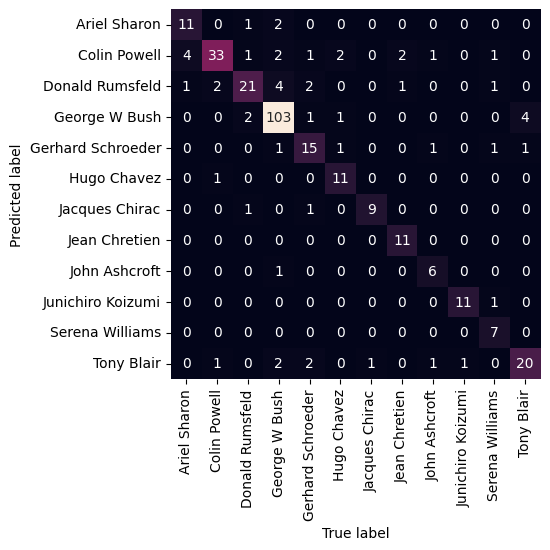

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(ytest, y_orid)

sns.heatmap(mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()
